In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import itertools


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler


In [3]:
def get_connection_url(db, username=os.getenv('sqlUSER'), host=os.getenv('sqlHOST'), password=os.getenv('sqlPSWD')):
    """
    This function will:
    - take username, pswd, host credentials from imported env module
    - output a formatted connection_url
    """
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [4]:
from env import host, username, password

def get_connection_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

### Clustering - DBSCAN

### 1. Use DBSCAN to detect anomalies in other products from the `customers` dataset. The database name is `grocery_db`.

In [ ]:
url = get_connection_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

In [ ]:
# select variables -- Cluster on all or a selected subset of features
fdd = df[["Frozen", "Detergents_Paper", "Delicassen"]]
fdd.head()

In [ ]:
# convert to array & dtype
df.info()

In [ ]:
fdd.iloc[0]

In [ ]:
fdd.values.astype("float32", copy=False)[0]

In [ ]:
#convert to an array and turn into float
np_array = fdd.values.astype("float32", copy=False)

In [ ]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
fdd_scaled = mms.fit_transform(np_array)

fdd_scaled

In [ ]:
# list of column names
fdd.columns

In [ ]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns =["Scaled_" + column for column in fdd.columns]

In [ ]:
# Save a copy of the original dataframe
original_df = df.copy()

In [ ]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(fdd_scaled, columns=scaled_columns)

In [ ]:
scaled_df

In [ ]:
# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=["key_0"])

In [ ]:
df.head()

In [ ]:
# create DBSCAN -- Make the object
dbsc = DBSCAN(eps = .1, min_samples=20)

# Fit the object
dbsc.fit(fdd_scaled)

In [ ]:
# cluster labels for each point
dbsc.labels_

In [ ]:
# Assign the cluster labels
df['fdd_labels'] = dbsc.labels_

In [ ]:
#see what this dataframe looks like
df.sample(5)

In [ ]:
#let's see what labels holds
df.fdd_labels.value_counts()

In [ ]:
for combination in itertools.combinations(fdd.columns, 2):
    print(combination)

In [ ]:
for combination in itertools.combinations(fdd.columns, 2):
    sns.scatterplot(df[combination[0]], df[combination[1]], hue= df.fdd_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Otliers")
    plt.show()

### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the `curriculum_logs` database.


In [ ]:
url = get_connection_url("curriculum_logs")

query = '''
SELECT date,
       path as endpoint,
       user_id,
       cohort_id,
       ip as source_ip
FROM logs;
'''

df = pd.read_sql(sql, url)
df.head()

In [ ]:
df.info()

In [ ]:
# Cluster on all or a selected subset of features
uc = df[["user_id", "cohort_id"]]


In [ ]:
uc.iloc[0]

In [ ]:
#convert to an array and turn into float
np_array = uc.values.astype("float32", copy=False)

In [ ]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
uc_scaled = mms.fit_transform(np_array)

uc_scaled

In [ ]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + column for column in uc.columns]

In [ ]:
# Save a copy of the original dataframe
original_df = df.copy()

In [ ]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(uc_scaled, columns=scaled_columns)

In [ ]:
uc_scaled

In [ ]:
# # Make the object
# dbsc = DBSCAN(eps = .01, min_samples=2)

# # Fit the object
# dbsc.fit(uc_scaled)

In [ ]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + column for column in uc.columns]

In [ ]:
test = pd.DataFrame(uc_scaled)
test[test.isnull()]

In [ ]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples=10)

# Fit the object
dbsc.fit(uc_scaled)

In [ ]:
df.head()

### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the <a href="https://ds.codeup.com/clustering/explore/#exercises">clustering evaluation exercises</a> (single unit properties with a logerror).

In [5]:
import wrangle as w

In [6]:
df = w.get_data()
df = w.clean_zillow()

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.
21610 outliers removed from tax.

Total of 54860 outliers removed.


In [7]:
df

,bedroom,bathroom,area,property_value,year,tax,fips,orange,ventura
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA,0,0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA,0,0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA,0,0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA,0,0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA,0,0
...,...,...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,LA,0,0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange,1,0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange,1,0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange,1,0


In [42]:
# Cluster on all or a selected subset of features
df_ab = df[["area", "bedroom"]]
ab = df[["area", "bedroom"]]
ab.head()

,area,bedroom
0,3633.0,4.0
1,1620.0,3.0
2,2077.0,3.0
3,1200.0,0.0
4,171.0,0.0


In [9]:
ab.iloc[0]

area       3633.0
bedroom       4.0
Name: 4, dtype: float64

In [10]:
#convert to an array and turn into float
np_array = ab.values.astype("float32", copy=False)

In [11]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
ab_scaled = mms.fit_transform(np_array)

ab_scaled

array([[0.5665263 , 0.5714286 ],
       [0.25253472, 0.42857146],
       [0.32381845, 0.42857146],
       ...,
       [0.48759943, 0.5714286 ],
       [0.3077523 , 0.42857146],
       [0.32896584, 0.5714286 ]], dtype=float32)

In [31]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + column for column in ab.columns]

In [32]:
# Save a copy of the original dataframe
original_df = df.copy()

In [33]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(ab_scaled, columns=scaled_columns)

In [34]:
scaled_df = scaled_df[:100]

In [45]:
# Merge the scaled and non-scaled values into one dataframe
df_ab = df_ab[:100]

In [46]:
df_ab.head()

,area,bedroom
0,3633.0,4.0
1,1620.0,3.0
2,2077.0,3.0
3,1200.0,0.0
4,171.0,0.0


In [37]:
ab_scaled = ab_scaled[:100]

In [47]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples=10)

In [48]:


# Fit the object
dbsc.fit(ab_scaled[:100])

DBSCAN(eps=0.1, min_samples=10)

In [49]:
dbsc.labels_

array([ 1,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  1,  0,  0,  1,  1,  1,
        1, -1,  2,  1,  1,  2,  1,  0,  1,  1,  0, -1,  0,  0,  2,  2,  2,
        0,  0,  1,  1,  0,  1, -1, -1,  2, -1, -1,  0,  0,  2,  0,  0,  2,
        2,  2,  0,  2,  0,  0,  0,  0,  1,  0,  2,  1,  0,  0,  0,  0, -1,
        2,  0,  0, -1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  2,
        0,  0,  1,  0,  0,  1,  1,  0,  2,  2,  0,  1,  2,  0,  2])

In [51]:
# Assign the cluster labels
df_ab['ab_labels'] = dbsc.labels_

In [52]:
df_ab

,area,bedroom,ab_labels
0,3633.0,4.0,1
1,1620.0,3.0,0
2,2077.0,3.0,0
3,1200.0,0.0,-1
4,171.0,0.0,-1
...,...,...,...
95,1144.0,3.0,0
96,2408.0,4.0,1
97,950.0,2.0,2
98,1400.0,3.0,0


In [54]:
#let's see what labels holds
df_ab.ab_labels.value_counts()

 0    47
 1    23
 2    18
-1    12
Name: ab_labels, dtype: int64

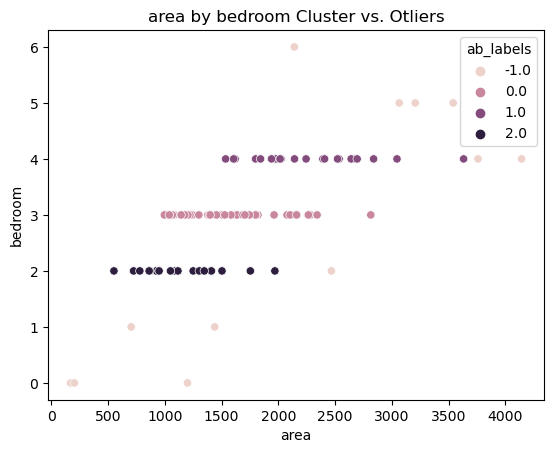

In [55]:
for combination in itertools.combinations(ab.columns, 2):
    sns.scatterplot(df[combination[0]], df_ab[combination[1]], hue= df_ab.ab_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Otliers")
    plt.show()